In [3]:
import pandas as pd
import numpy as np

In [5]:
telco = pd.read_csv('C://Users/mkrijal/Desktop/Assignment1/Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco.groupby(['InternetService', 'gender']).size()

InternetService  gender
DSL              Female    1188
                 Male      1233
Fiber optic      Female    1553
                 Male      1543
No               Female     747
                 Male       779
dtype: int64

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
churn = telco.loc[: , "MonthlyCharges":"Churn"]
churn.head()


,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,No
1,56.95,1889.5,No
2,53.85,108.15,Yes
3,42.30,1840.75,No
4,70.70,151.65,Yes


In [123]:
churn.TotalCharges = churn.TotalCharges.astype(float)  #change obj to float
churn['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [128]:
from scipy.stats import mode

mode(churn['TotalCharges'])

churn['TotalCharges'].fillna(mode(churn['TotalCharges']).mode[0], inplace=True) #input missing values


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


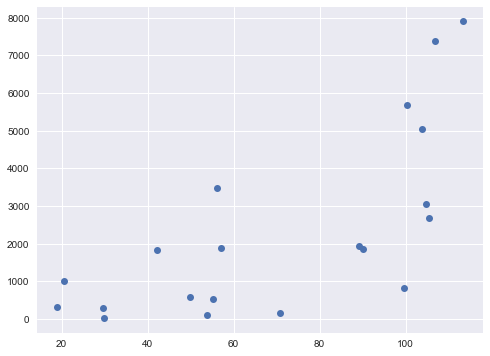

In [124]:
X = churn.MonthlyCharges[0:20]
Y = churn.TotalCharges[0:20]

plt.plot(X, Y, 'o');

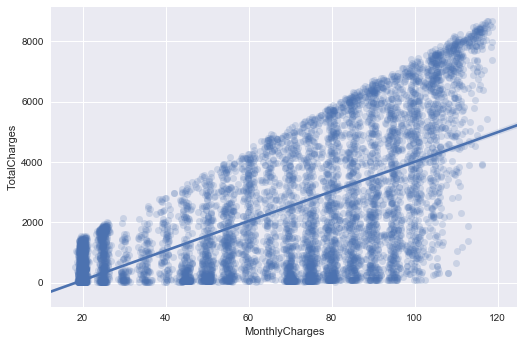

In [138]:
# Seaborn scatter plot with regression line
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn, aspect=1.5, scatter_kws={'alpha':0.2})

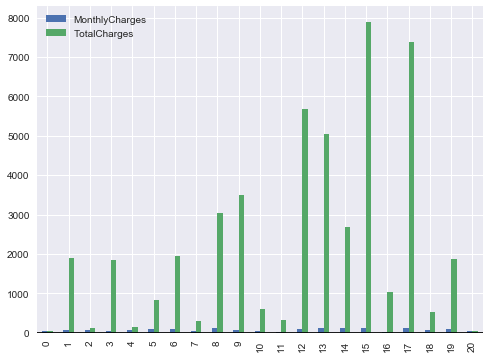

In [131]:
plt.figure();

churn.loc[0:20].plot(kind='bar'); plt.axhline(0, color='k')

In [20]:
tenure = telco.loc[: , "tenure"]
tenure.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

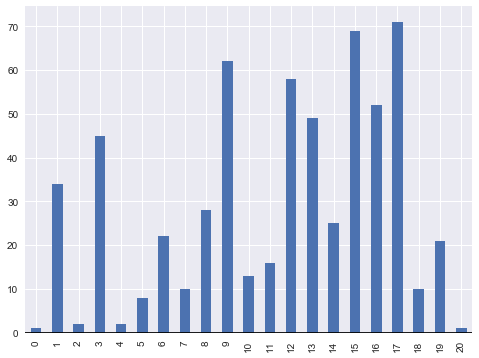

In [132]:
plt.figure();

tenure.loc[0:20].plot(kind='bar'); plt.axhline(0, color='k')

In [23]:
cust_profile = telco[['gender', 'SeniorCitizen', 'Partner', 'Churn']]
cust_profile.head()

,gender,SeniorCitizen,Partner,Churn
0,Female,0,Yes,No
1,Male,0,No,No
2,Male,0,No,Yes
3,Male,0,No,No
4,Female,0,No,Yes


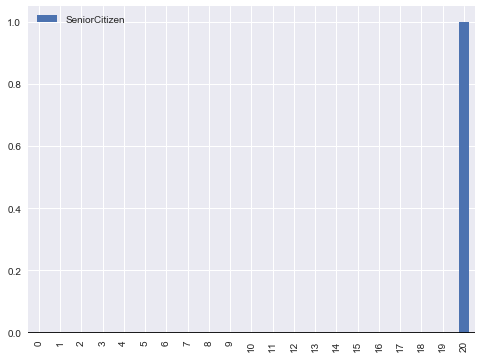

In [133]:
plt.figure();

cust_profile.loc[0:20].plot(kind='bar'); plt.axhline(0, color='k')

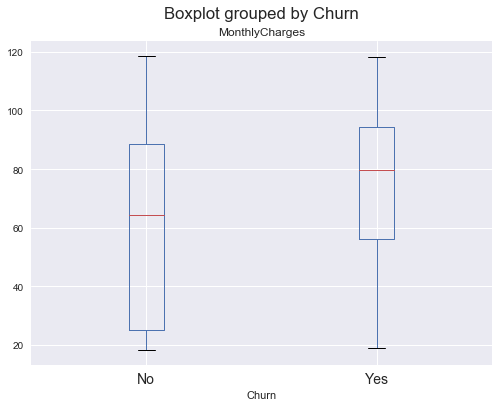

In [134]:
churn.boxplot(column="MonthlyCharges",by="Churn")

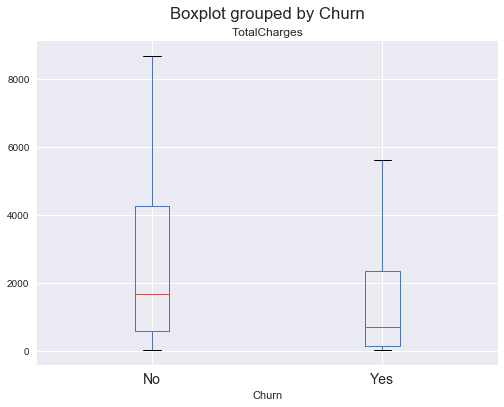

In [137]:
churn.boxplot(column="TotalCharges",by="Churn")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000EE06EFEE10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000EE07018860>], dtype=object)

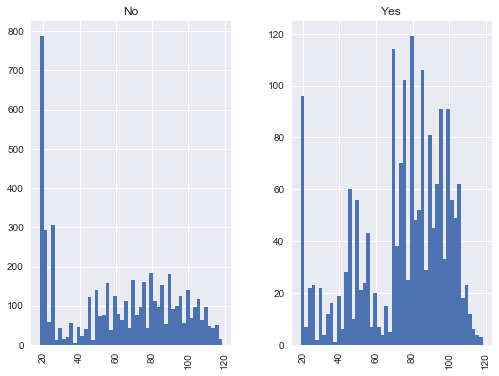

In [135]:
churn.hist(column="MonthlyCharges",by="Churn",bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EE0297AA20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000EE068FA0F0>]], dtype=object)

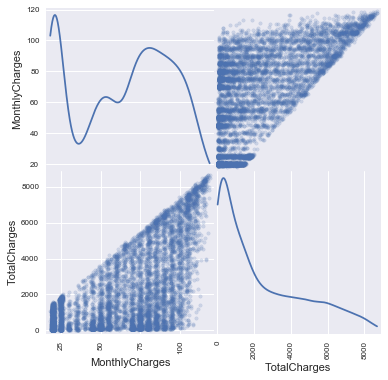

In [139]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(churn, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [129]:
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression

churn_X = churn.MonthlyCharges[:, np.newaxis]

churn_X_train = churn_X[:-20] #training set
churn_X_test = churn_X[-20:]  #testing set

churn_y_train = churn.TotalCharges[:-20]  #training set
churn_y_test = churn.TotalCharges[-20:]   #testing set

regr = linear_model.LinearRegression()

regr.fit(churn_X_train, churn_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients: 
 [ 49.01662537]
Mean squared error: 3282265.28
Variance score: 0.46


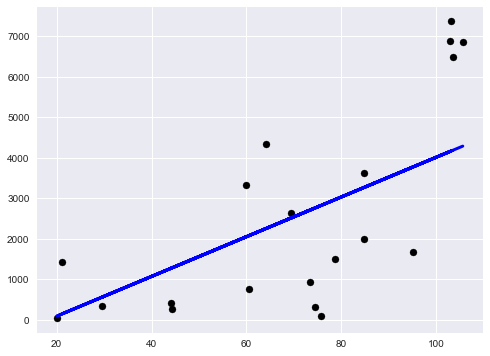

In [136]:
print('Coefficients: \n', regr.coef_)

print ('Mean squared error: %.2f' % np.mean((regr.predict(churn_X_test) - churn_y_test) ** 2))

print('Variance score: %.2f' % regr.score(churn_X_test, churn_y_test))

#splt.scatter(churn_X_test, churn_y_test, color='black')plt.plot(churn_X_test, regr.predict(churn_X_test), color='blue',linewidth=3)plt.xticks(())plt.yticks(())plt.show()
plt.scatter(churn_X_test, churn_y_test, color='black')
plt.plot(churn_X_test, regr.predict(churn_X_test), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()